In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def compactness(mask_path):
    '''assesses the compactness of the lesion - irregularity of edges'''
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE) # load mask
    _, mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY) # ensure mask is binary
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    largest_contour = max(contours, key=cv2.contourArea)
    
    area = cv2.contourArea(largest_contour)
    perimeter = cv2.arcLength(largest_contour, True)
    
    compactness = (4 * np.pi * area) / (perimeter ** 2)
    
    return compactness

In [21]:
def plot_and_save(mask_path, output_folder):
    '''plots a binary mask and saves the figure with the compactness in the title.'''
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE) # load mask

    comp_value = compactness(mask_path)
    comp_rounded = round(comp_value, 4)

    plt.figure(figsize=(6, 6))
    plt.imshow(mask, cmap='gray')
    plt.title(f'Compactness: {comp_rounded}')
    plt.axis('off')  # turn off the axis

    # save the plot to the specified folder
    save_path = f"{output_folder}/compactness_{comp_rounded}.png"
    plt.savefig(save_path)
    plt.show()


### perfect circle

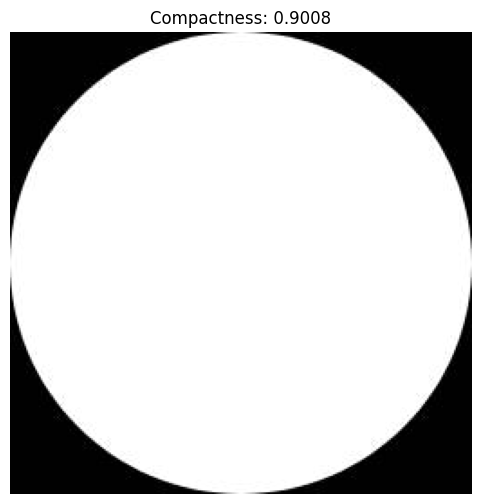

In [22]:
plot_and_save('./perfect_circle.jpg', './testing_images/compactness/')

### random lesions

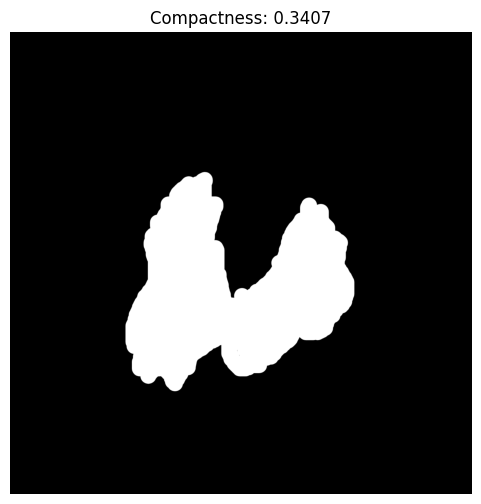

In [24]:
plot_and_save('../good_bad_images/MEL/good/masks/lucie/PAT_486_929_274_mask.png', './testing_images/compactness/')

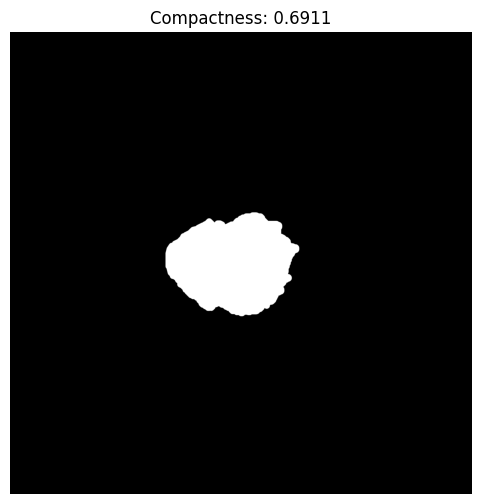

In [28]:
plot_and_save('../good_bad_images/MEL/good/masks/lucie/PAT_894_1679_640_mask.png', './testing_images/compactness/')

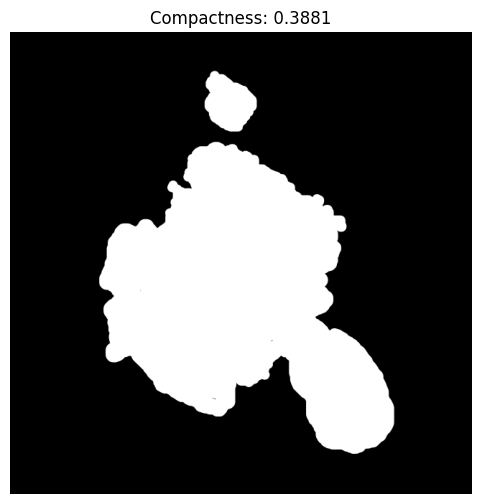

In [29]:
plot_and_save('../good_bad_images/MEL/good/masks/lucie/PAT_614_1166_885_mask.png', './testing_images/compactness/')

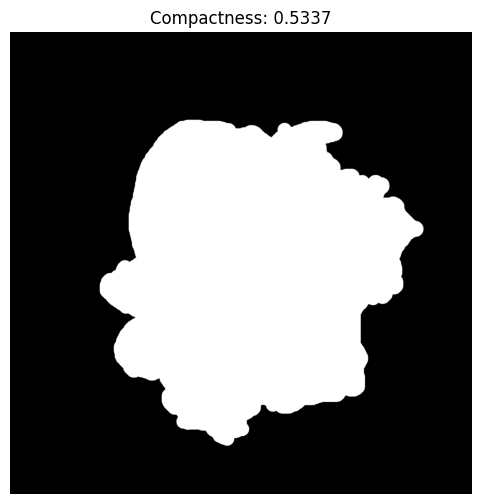

In [30]:
plot_and_save('../good_bad_images/MEL/good/masks/lucie/PAT_340_714_314_mask.png', './testing_images/compactness/')